In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [3]:
train = pd.read_csv('data/labeledTrainData.tsv', 
                    header=0, delimiter='\t', quoting=3)
test = pd.read_csv('data/testData.tsv', 
                   header=0, delimiter='\t', quoting=3)

print(train.shape)
print(test.shape)

print(train['review'].size)
print(test['review'].size)


(25000, 3)
(25000, 2)
25000
25000
(25000, 3)
(25000, 2)
25000
25000


In [ ]:
train.head()

In [ ]:
# train 에 있는 평점정보인 sentiment 가 없음
test.head()

In [4]:
from KaggleWord2VecUtility import KaggleWord2VecUtility
import itertools

In [ ]:
def chain(*iterables):
    # chain('ABC', 'DEF') --> ['A', 'B', 'C', 'D', 'E', 'F']
    for it in iterables:
        for element in it:
            yield element

In [ ]:
# 말뭉치 리스트 안의 문장 리스트를 단어들의 리스트로 이어주는 함수
def chaining_corpus(wordlist) :
    wordlist = list(itertools.chain(*wordlist))
    return wordlist

In [ ]:
chaining_corpus(KaggleWord2VecUtility.review_to_sentences(train['review'][0]))[:10]

In [ ]:
KaggleWord2VecUtility.review_to_wordlist(train['review'][0])[:10]

In [ ]:
KaggleWord2VecUtility.review_to_wordlist_with_tag(train['review'][0])[:10]

In [ ]:
sentences = []
# stopword 제거 하지 않고, 품사 태깅
# 품사 태깅을 하면 얻어지는 효과 - 의미를 더 정확하게 표현할 수 있음

for review in train["review"]:
    sentences += KaggleWord2VecUtility.review_to_sentences(
        review, remove_stopwords=False)

In [ ]:
len(sentences)

In [ ]:
sentences[0][:10]

In [ ]:
sentences[1][:10]

In [ ]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s',
    level=logging.INFO)

In [5]:
#하이퍼 파라메터 값 지정
num_features = 300 # 문자 벡터 차원수
min_word_count = 40 # 최소 문자 수
num_workers = 4 # 병렬 쓰레드 수
context = 20 # window size
downsampling = 1e-3 # 문자 빈도 수 downsample

In [ ]:

# 초기화 및 모델 학습
from gensim.models import word2vec

#모델 학습
model = word2vec.Word2Vec(sentences,
                                                  workers = num_workers,
                                                  size = num_features,
                                                  min_count = min_word_count,
                                                  window = context,
                                                  sample = downsampling)
model

In [6]:
# model load
import gensim
model = gensim.models.Word2Vec.load('./300features_40minwords_10text')

In [ ]:
# 학습이 완료 되면 필요없는 메모리를 unload 시킨다.
model.init_sims(replace=True)

model_name = '300features_40minwords_10text'
# model_name = '300features_50minwords_20text'
# 모델 저장
model.save(model_name)

In [ ]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('man/NN woman/NN child/NN son/NN'.split())

In [ ]:
model.wv.doesnt_match('korea/NN china/NN japan/NN'.split())

In [ ]:
# 가장 유사한 단어를 추출
model.wv.most_similar("mayb/NN")

In [ ]:
model.wv.most_similar("terribl/JJ")

In [7]:
model.wv.most_similar("movi/NN")

[('film/NN', 0.7346237301826477),
 ('movi/VBZ', 0.7136697769165039),
 ('flick/NN', 0.6410326957702637),
 ('movi/JJ', 0.6279988288879395),
 ('sequel/NN', 0.556523859500885),
 ('movi/NNS', 0.5487258434295654),
 ('movi/VBP', 0.4862799048423767),
 ('movi/FW', 0.47301942110061646),
 ('it/PRP', 0.4698997437953949),
 ('turkey/NN', 0.4504893720149994)]

[('film/NN', 0.7346237301826477),
 ('movi/VBZ', 0.7136697769165039),
 ('flick/NN', 0.6410326957702637),
 ('movi/JJ', 0.6279988288879395),
 ('sequel/NN', 0.556523859500885),
 ('movi/NNS', 0.5487258434295654),
 ('movi/VBP', 0.4862799048423767),
 ('movi/FW', 0.47301942110061646),
 ('it/PRP', 0.4698997437953949),
 ('turkey/NN', 0.4504893720149994)]

In [24]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '300features_40minwords_10text'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

8340
[ 0.02081642  0.05565172 -0.06800307 -0.06239561 -0.06136277  0.04874882
 -0.01451871 -0.03957126 -0.12019422  0.05727958]
8340
[ 0.02081642  0.05565172 -0.06800307 -0.06239561 -0.06136277  0.04874882
 -0.01451871 -0.03957126 -0.12019422  0.05727958]


In [25]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns = ['x','y'])
df.shape

(100, 2)

(100, 2)

In [ ]:
df.head(15)

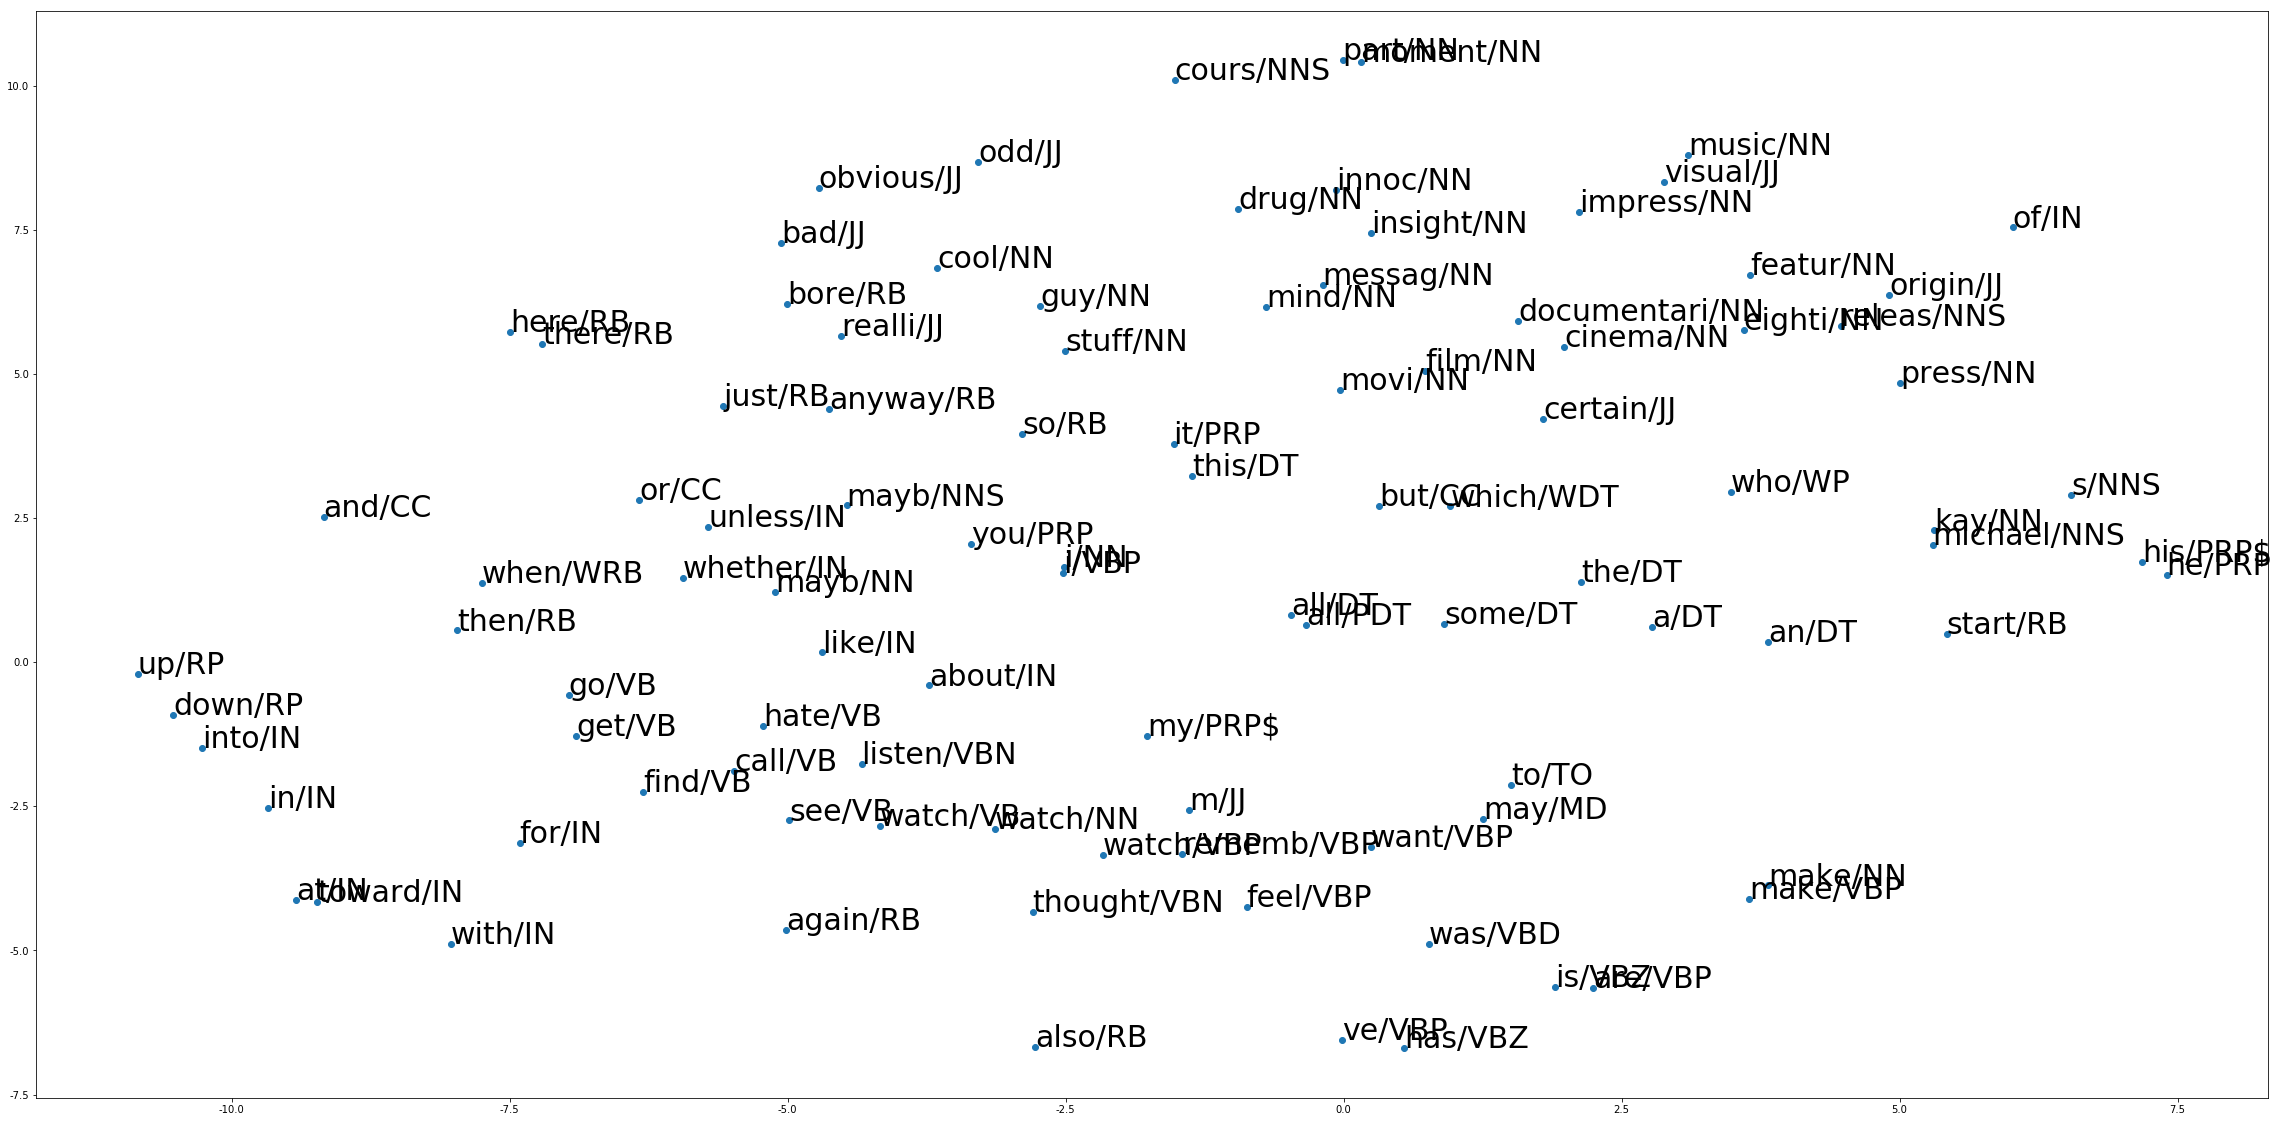

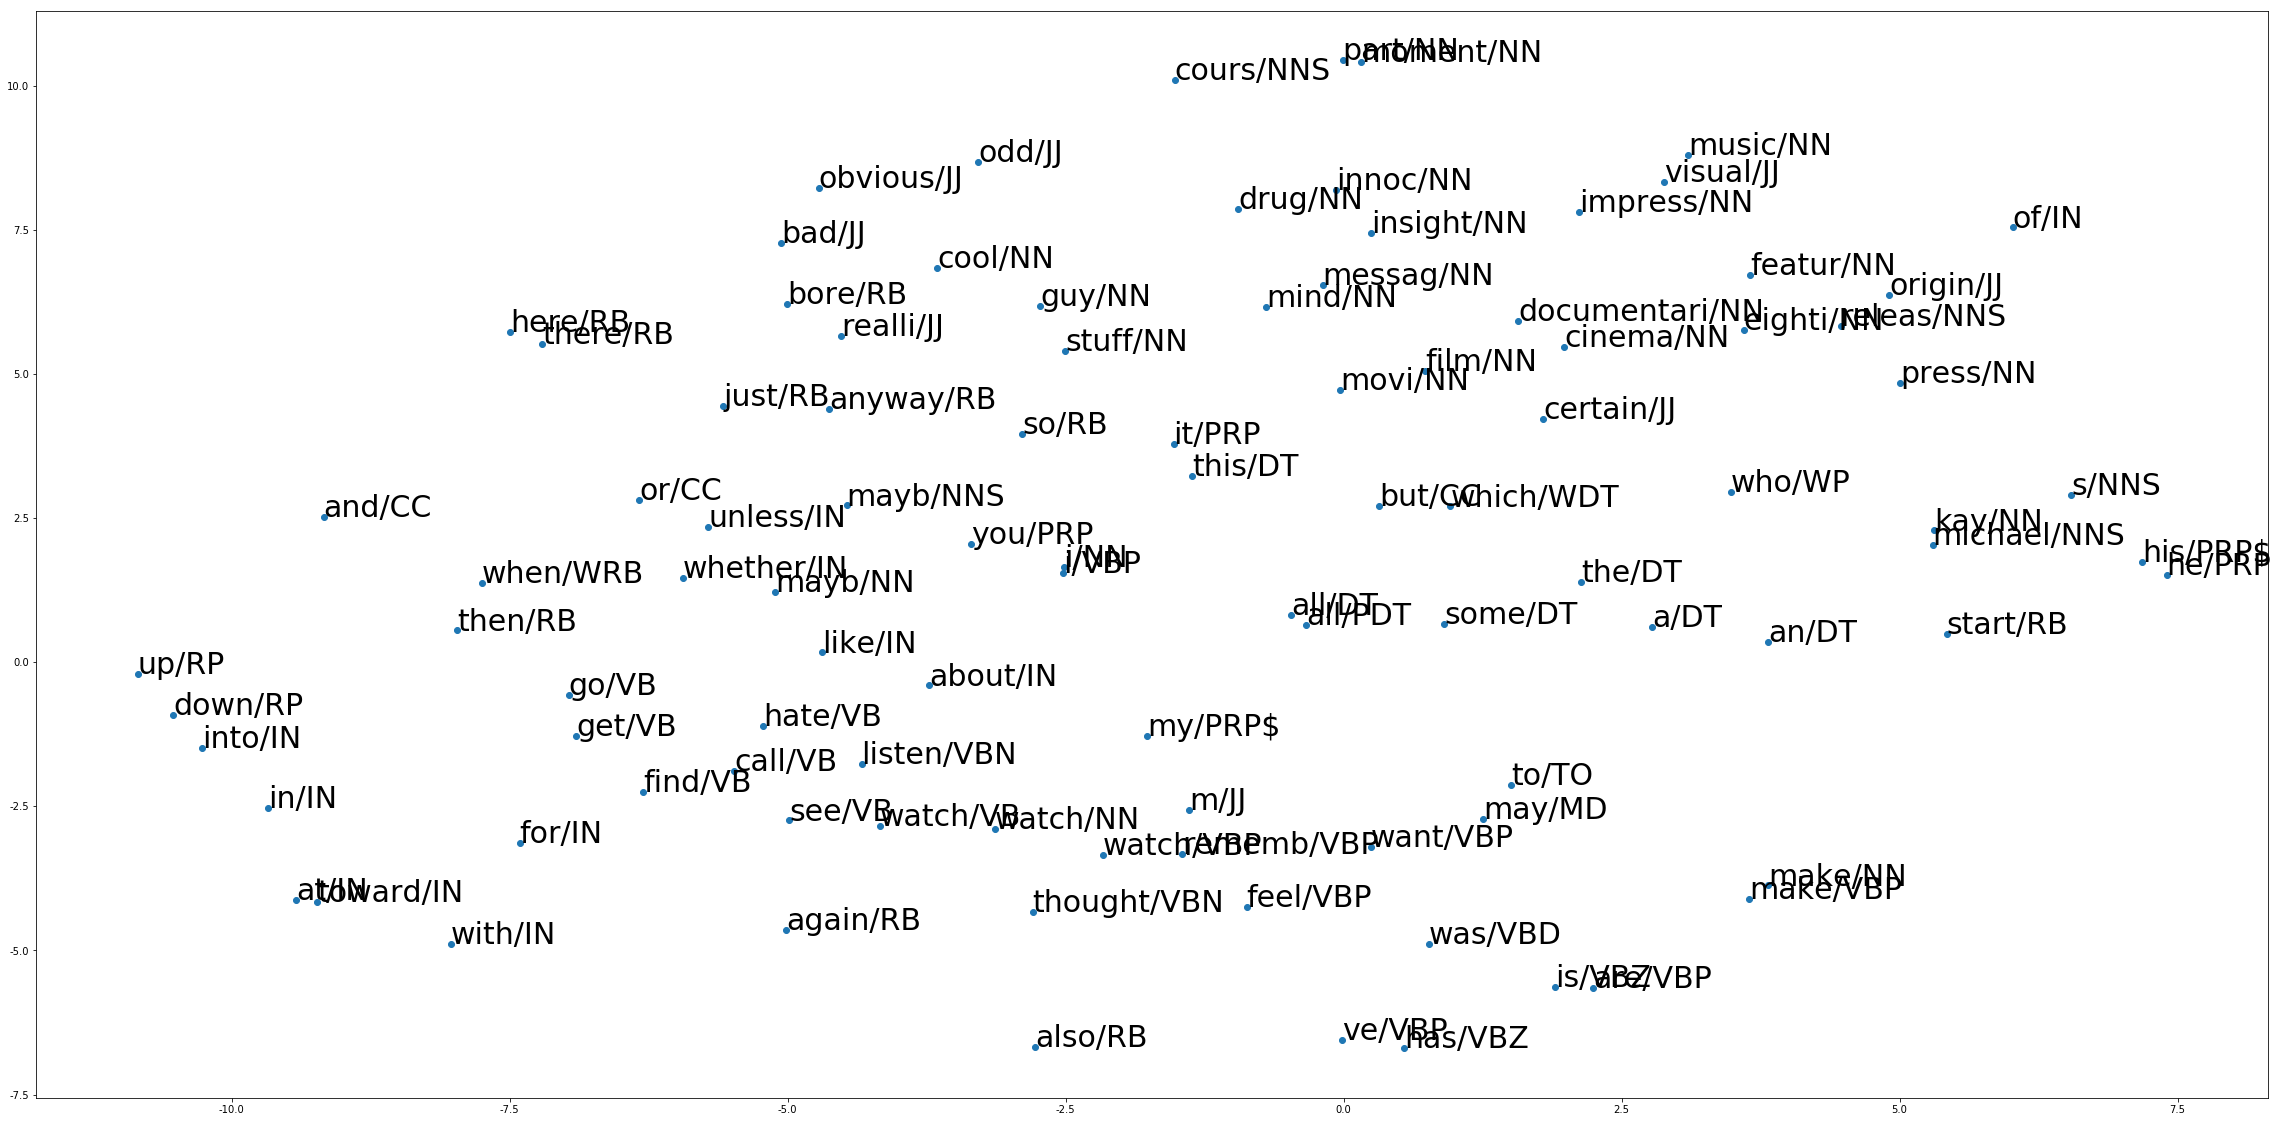

In [26]:
# 임베딩 된 단어를 시각화
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [8]:
# 표현 @@@@@@@
# 태깅된 품사에 따라 피쳐 벡터 값의 가중치를 다르게 곱해주는 방식

# 가장 적합한 가중치 크기에 대한 가설
# CC	coordinating conjunction 상관 접속사 낮게
# CD	cardinal digit 숫자 서수 중간
# DT	determiner 결정자 중간
# EX	existential there (like: "there is" … think of it like "there exists")  중간
# FW	foreign word 낮게
# IN	preposition/subordinating conjunction 낮게
# JJ	adjective	'big' 높게
#JJR	adjective, comparative	'bigger' 높게
#JJS	adjective, superlative	'biggest' 높게
# LS	list marker	1) 낮게
# MD	modal	could, will 중간
# NN	noun, singular 'desk' 중간
# NNS	noun plural	'desks' 중간
# NNP	proper noun, singular	'Harrison' 낮게
# NNPS	proper noun, plural	'Americans' 낮게
# PDT	predeterminer	'all the kids'  높게
# POS	possessive ending	parent's 낮게
# PRP	personal pronoun	I, he, she 낮게
# PRP$	possessive pronoun	my, his, hers 낮게
# RB	adverb	very, silently, 높게
# RBR	adverb, comparative	better
# RBS	adverb, superlative	best 높게
# RP	particle	give up 중간
# TO	to	go 'to' the store. 중간
# UH	interjection	errrrrrrrm 높게
# VB	verb, base form	take 높게
# VBD	verb, past tense	took 높게
# VBG	verb, gerund/present participle	taking 높게
# VBN	verb, past participle	taken 높게
# VBP	verb, sing. present, non-3d	take 높게
# VBZ	verb, 3rd person sing. present	takes 높게
# WDT	wh-determiner	which 낮게
# WP	wh-pronoun	who, what 낮게
# WP$	possessive wh-pronoun	whose 낮게
# WRB	wh-abverb	where, when 중간


import numpy as np

def makeFeatureVec(words, model, num_features) :
    # 주어진 문장에서 단어 벡터의 평균을 구함
    
    # 속도를 위해 0으로 채운 배열로 초기화
    featureVec = np.zeros((num_features,),dtype="float32")
    
    nwords = 0.
    # Index2word는 모델의 사전에 있는 단어명을 담은 리스트
    # 속도 향상을 위해 set 형태로 초기화
    index2word_set = set(model.wv.index2word)
    # 루프를 돌며 모델 사전에 포함이 되면 피처벡터에 추가
    for word in words:
        if word in index2word_set: # 모델에 있는 단어면
            nwords = nwords + 1. 
            featureVec = np.add(featureVec, model[word])
    # 결과를 단어수로 나누어 평균을 구함
    featureVec = np.divide(featureVec, nwords)
    return featureVec        

In [9]:
def getAvgFeatureVecs(reviews, model, num_features) :
    # 리뷰 단어 목록의 각각에 대한 평균 feature 벡터를 계산
    # 2D numpy 배열 반환
    
    # 카운터를 초기화
    counter = 0.
    # 속도를 위해 2D 넘파이 배열을 미리 할당
    reviewFeatureVecs = np.zeros(
    (len (reviews), num_features), dtype="float32")
    
    for review in reviews:
        # 매 1000개 리뷰마다 상태 출력
        if counter % 1000 == 0.:
            print("Review %d of %d" % (counter, len(reviews)))
        # 평균 피처 벡터를 만들기 위해 위에서 정의한 함수를 호출한다.
        reviewFeatureVecs[int(counter)] = makeFeatureVec(review, model, \
           num_features)
            # 카운터를 증가
        counter = counter + 1.
    print(reviewFeatureVecs)    
    return reviewFeatureVecs 

In [10]:
# 멀티스레드로 4개 워커를 사용해 처리한다.
def getCleanReviews(reviews):
    clean_reviews = []
    clean_reviews = KaggleWord2VecUtility.apply_by_multiprocessing(\
        reviews["review"], KaggleWord2VecUtility.review_to_wordlist_with_tag,\
        workers=4)
    return clean_reviews 

In [11]:
%time trainDataVecs = getAvgFeatureVecs(\
    getCleanReviews(train), model, num_features )

Review 0 of 25000
Review 0 of 25000
Review 1000 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 22000 of 25000
Review 23000 o

In [12]:
%time testDataVecs = getAvgFeatureVecs(\
        getCleanReviews(test), model, num_features )

Review 0 of 25000
Review 0 of 25000
Review 1000 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 22000 of 25000
Review 23000 o

In [13]:
# 결과 학습 부분 - CNN? RNN? Decision Tree? ...
# Decision Tree 기반의 RandomForest 사용

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators = 100, oob_score = True, n_jobs = -1, random_state=2018)

In [14]:
%time forest = forest.fit( trainDataVecs, train["sentiment"] )

CPU times: user 1min 17s, sys: 424 ms, total: 1min 18s
Wall time: 21.3 s
CPU times: user 1min 17s, sys: 424 ms, total: 1min 18s
Wall time: 21.3 s


In [15]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(\
    forest, trainDataVecs, \
    train['sentiment'], cv=10, scoring='roc_auc'))

CPU times: user 13.6 s, sys: 4.05 s, total: 17.6 s
Wall time: 3min 21s
CPU times: user 13.6 s, sys: 4.05 s, total: 17.6 s
Wall time: 3min 21s


In [16]:
score

0.8857928639999999

0.8857928639999999

In [17]:
result = forest.predict(testDataVecs)

In [18]:
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )
output.to_csv('data/Word2Vec_AverageVectors_{0:.5f}.csv'.format(score), 
              index=False, quoting=3 )

In [19]:
output_sentiment = output['sentiment'].value_counts()
print(output_sentiment[0] - output_sentiment[1])
output_sentiment

340
340


0    12670
1    12330
Name: sentiment, dtype: int64

0    12670
1    12330
Name: sentiment, dtype: int64

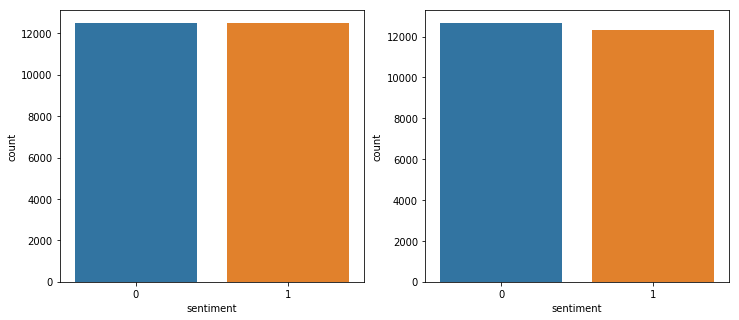

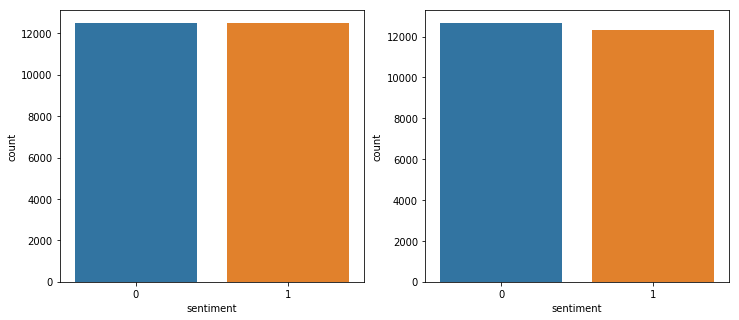

In [27]:
import seaborn as sns 
%matplotlib inline

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.countplot(train['sentiment'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])